<a href="https://colab.research.google.com/github/Sergi095/deeplearning_vu/blob/master/deeplearning_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# code from github, P. Bloem


In [ ]:
# -- assignment 1 --
import numpy as np
from urllib import request
import gzip
import pickle
import os

def load_synth(num_train=60_000, num_val=10_000, seed=0):
    """
    Load some very basic synthetic data that should be easy to classify. Two features, so that we can plot the
    decision boundary (which is an ellipse in the feature space).
    :param num_train: Number of training instances
    :param num_val: Number of test/validation instances
    :param num_features: Number of features per instance
    :return: Two tuples and an integer: (xtrain, ytrain), (xval, yval), num_cls. The first contains a matrix of training
     data with 2 features as a numpy floating point array, and the corresponding classification labels as a numpy
     integer array. The second contains the test/validation data in the same format. The last integer contains the
     number of classes (this is always 2 for this function).
    """
    np.random.seed(seed)

    THRESHOLD = 0.6
    quad = np.asarray([[1, -0.05], [1, .4]])

    ntotal = num_train + num_val

    x = np.random.randn(ntotal, 2)

    # compute the quadratic form
    q = np.einsum('bf, fk, bk -> b', x, quad, x)
    y = (q > THRESHOLD).astype(np.int)

    return (x[:num_train, :], y[:num_train]), (x[num_train:, :], y[num_train:]), 2

def load_mnist(final=False, flatten=True):
    """
    Load the MNIST data.
    :param final: If true, return the canonical test/train split. If false, split some validation data from the training
       data and keep the test data hidden.
    :param flatten: If true, each instance is flattened into a vector, so that the data is returns as a matrix with 768
        columns. If false, the data is returned as a 3-tensor preserving each image as a matrix.
    :return: Two tuples and an integer: (xtrain, ytrain), (xval, yval), num_cls. The first contains a matrix of training
     data and the corresponding classification labels as a numpy integer array. The second contains the test/validation
     data in the same format. The last integer contains the number of classes (this is always 2 for this function).
     """
    # google colab
    if not os.path.isfile('/content/mnist.pkl'):
        init()

    xtrain, ytrain, xtest, ytest = load()
    xtl, xsl = xtrain.shape[0], xtest.shape[0]

    if flatten:
        xtrain = xtrain.reshape(xtl, -1)
        xtest  = xtest.reshape(xsl, -1)

    if not final: # return the flattened images
        return (xtrain[:-5000], ytrain[:-5000]), (xtrain[-5000:], ytrain[-5000:]), 10

    return (xtrain, ytrain), (xtest, ytest), 10

# Numpy-only MNIST loader. Courtesy of Hyeonseok Jung
# https://github.com/hsjeong5/MNIST-for-Numpy

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
# init()

In [ ]:
init()

Download complete.
Save complete.


# theoretical part (Part 1)


Call the linear (non-activated) outputs of the network oi and call the corresponding
softmax-activated nodes yi (where i ranges over the number of classes). For a given
instance x with a true class c, we then have:

$$y_{i} = \frac{exp(o_{i})}{\sum_{j} exp(o_{j})}$$
$$l = -log(y_c)$$

Where $l$ is loss.


1) Workout the local derivatives of both, in scalar terms. Show derivation. Assume that target class is given as an integer value.

Tip: look for $\frac{\partial l}{\partial y_i}$ and $\frac{\partial y_i}{\partial o_j}$. Note that because of the sum in the softmax formula, $y_i$ depends on all $o_j$. It may be helpful to workout $\frac{\partial y_i}{\partial o_i}$ and $\frac{\partial y_i}{\partial o_j}$ separately (where in the last case $i \neq j$ ).


Note also that the true class c is given as an integer, so it may be helpful to write the loss as:

$$ loss =  \sum_i l_i$$
$$l_i = \left\{\begin{matrix}
\cdots  \ if \ c=i \\
0 \ otherwise
\end{matrix}\right.$$


2) Workout the derivative $\frac{\partial l}{\partial o_i}$. Why is this not strictly necessary for a neural newtwork, if we already have the two derivatives we worked above?


[`Answer:`]

1) The local derivatives of the softmax function and the loss function are as follows:

For the softmax function, we have:

$$y_{i} = \frac{exp(o_{i})}{\sum_{j} exp(o_{j})}$$

The derivative of $y_i$ with respect to $o_i$ is:

$$\frac{\partial y_i}{\partial o_i} = y_i \cdot (1 - y_i)$$

And the derivative of $y_i$ with respect to $o_j$ where $i \neq j$ is:

$$\frac{\partial y_i}{\partial o_j} = -y_i \cdot y_j$$

For the loss function, we have:

$$l = -log(y_c)$$

The derivative of $l$ with respect to $y_i$ is:

$$\frac{\partial l}{\partial y_i} = \left\{\begin{matrix}
-\frac{1}{y_i} & if & i=c \\
0 & otherwise
\end{matrix}\right.$$

2) The derivative of the loss function with respect to $o_i$ is:

$$\frac{\partial l}{\partial o_i} = \frac{\partial l}{\partial y_i} \cdot \frac{\partial y_i}{\partial o_i}$$

This derivative is not strictly necessary for a neural network because the backpropagation algorithm, which is used to train neural networks, only requires the derivatives of the loss function with respect to the weights and biases of the network. These can be computed using the chain rule and the local derivatives we worked out above. Therefore, it's not necessary to compute the derivative of the loss function with respect to the outputs of the network directly. However, it can be useful for understanding how changes in the outputs of the network affect the loss.



# Part 2 Backpropagation

## modules

In [ ]:
import math
import random

class Linear_layer(object):
    def __init__(self,
                 input_dim: int,
                 output_dim: int,
                 random_init=True,
                 first_layer=False):

        self.size = (input_dim, output_dim)
        self.parameters = {}
        self.gradients = {}
        self.random_init = random_init

        if self.random_init:
            self.print_ = False
            self.parameters['W'] = [[random.uniform(0, 0.1) for _ in range(output_dim)] for _ in range(input_dim)]
            self.parameters['b'] = [0.0] * output_dim
            self.gradients['W']  = [[0.0] * output_dim for _ in range(input_dim)]
            self.gradients['b']  = [0.0] * output_dim
        else: # This is the test case !
            self.print_ = True
            if first_layer:
                W1 = [[1.0] * output_dim, [-1.0] * output_dim]
                self.parameters['W'] = W1
                self.parameters['b'] = [0.0] * output_dim
                self.gradients['W']  = [[0.0] * output_dim for _ in range(input_dim)]
                self.gradients['b']  = [0.0] * output_dim
            else:
                W1 = [[1.0] * output_dim, [-1.0] * output_dim]
                W2 = [[1.0] * output_dim, [-1.0] * output_dim, [-1.0] * output_dim]
                self.parameters['W'] = W1 + W2
                self.parameters['b'] = [0.0] * output_dim
                self.gradients['W']  = [[0.0] * output_dim for _ in range(input_dim)]
                self.gradients['b']  = [0.0] * output_dim

    def forward(self, x: list, y: int)-> list:
        self.x = x
        result = [sum(x_i * w_ij for x_i, w_ij in zip(x, col)) + b_i for col, b_i in zip(zip(*self.parameters['W']), self.parameters['b'])] # Wx + b
        #print(result)
        return result

    def backward(self, grad: list, y: int)-> list:
        """
        Backward pass of linear layer
        """
        self.gradients['W'] = [[x_i * g_j for g_j in grad] for x_i in self.x]  # dL/dW = x * dL/dy
        self.gradients['b'] = grad # dL/db = dL/dy
        dx = [sum(g_i * w_ij for g_i, w_ij in zip(grad, w_i)) for w_i in self.parameters['W']] # dL/dx = W * dL/dy
        if self.print_:
            print("gradients: ", self.gradients)
        return dx

    def clear_cache(self)-> None:
        self.x = None

    def __repr__(self):
        return f"Linear_layer({self.size})"



class Sigmoid_layer(object):
    def forward(self, x: list, y: int)-> list:
        self.x = x
        #print("x: ", x)
        result = [1 / (1 + math.exp(-x_i)) for x_i in x] # sigmoid(x)
        return result

    def backward(self, grad: list, y: int)-> list:
        result = [grad_j * sig * (1 - sig) for grad_j, sig in zip(grad, self.forward(self.x, y))] # grad * sigmoid(x) * (1 - sigmoid(x))
        return result

    def clear_cache(self)-> None:
        self.x = None

    def __repr__(self):
        return "Sigmoid_layer()"



class SoftmaxCrossEntropy(object):
    def __init__(self, random_init: bool =True):
        self.random_init = random_init

    def forward(self, x: list, y: int)-> tuple:
        self.x = x
        self.y = y
        #e_x = [math.exp(x_i - max(x)) for x_i in x]
        e_x = [math.exp(x_i) for x_i in x]
        probs = [e_x_i / sum(e_x) for e_x_i in e_x] # softmax(x)
        loss = -math.log(probs[y]) # cross entropy loss
        return loss, probs

    def backward(self, probs: list, target: int)-> float:
        dprobs = probs.copy()
        dprobs[target] -= 1 # dL/dx = softmax(x) - y
        return dprobs

    def clear_cache(self)-> None:
        self.x = None
        self.y = None

    def __repr__(self):
        return "SoftmaxCrossEntropy()"


## Q3 MLP

In [ ]:
class MLP(object):


    def __init__(self,
                 input_dim: int,
                 hidden_dim: int,
                 output_dim: int,
                 update: bool = False,
                 random_init: bool = True) -> None:
        """
        Initialize MLP with input, hidden and output dimensions

        This model only supports lists as input and output.
        """
        self.input_dim  = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.update     = update

        self.modules = []
        if random_init:
            for i in range(len(hidden_dim)):
                if i == 0: # first layer
                    self.modules.append(Linear_layer(input_dim, hidden_dim[i]))
                    self.modules.append(Sigmoid_layer())
                elif i == len(hidden_dim) - 1: # last layer
                    self.modules.append(Linear_layer(hidden_dim[i - 1], output_dim))
                    self.modules.append(SoftmaxCrossEntropy())
                else: # hidden layers
                    self.modules.append(Linear_layer(hidden_dim[i - 1], hidden_dim[i]))
                    self.modules.append(Sigmoid_layer())
        else: # initialize with test case values
                self.modules.append(Linear_layer(input_dim, hidden_dim[0], random_init=False, first_layer=True))
                self.modules.append(Sigmoid_layer())
                self.modules.append(Linear_layer(hidden_dim[0], output_dim, random_init=False))
                self.modules.append(SoftmaxCrossEntropy(random_init))
        # print("modules in the model: ", self.modules)

    def forward(self, x: list, y: list) -> list:
        """
        Forward pass of MLP
        """
        for module in self.modules:
            x = module.forward(x, y)
        return x

    def backward(self, grad: list, y: list) -> list:
        """
        Backward pass of MLP
        """
        for module in reversed(self.modules):
            # print("module: ", module, "\n")
            grad = module.backward(grad, y)
        return grad

    def update_parameters(self, lr: float) -> None:
        """
        Update parameters of MLP with SGD
        """
        for module in self.modules:
            if isinstance(module, Linear_layer):
                for i in range(len(module.parameters['W'])):
                    for j in range(len(module.parameters['W'][i])):
                        if i < len(module.gradients['W']) and j < len(module.gradients['W'][i]):
                            module.parameters['W'][i][j] -= lr * module.gradients['W'][i][j]

                # Update each element in b
                for i in range(len(module.parameters['b'])):
                    if i < len(module.gradients['b']):
                        module.parameters['b'][i] -= lr * module.gradients['b'][i]


    def get_parameters(self)-> list:
        '''
        Get the weights of the model
        '''
        parameters = []
        for module in self.modules:
            if isinstance(module, Linear_layer):
                parameters.append(module.parameters['W'])
                parameters.append(module.parameters['b'])
        return parameters

    def clear_cache(self)-> None:
        for module in self.modules:
            module.clear_cache()


    def __repr__(self):
        repr_ = f"MLP({self.input_dim}, {self.hidden_dim}, {self.output_dim})" + f" with {self.modules} modules"
        return repr_

## Test and Q3 answer

In [ ]:
# following the picture given in the assignment
input_dim = 2 # number of input features
hidden_dim = [3,2] # number of hidden units per layer
output_dim = 2 # number of classes

# test case
model = MLP(input_dim, hidden_dim, output_dim, random_init=False)
print("model: ", model)
print()
X, y = np.array([1, -1]), 0
lr = 0.00001

loss, probs = model.forward(X, y)
grad = model.backward(probs, y)

model:  MLP(2, [3, 2], 2) with [Linear_layer((2, 3)), Sigmoid_layer(), Linear_layer((3, 2)), SoftmaxCrossEntropy()] modules

gradients:  {'W': [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]], 'b': [-0.5, 0.5]}
gradients:  {'W': [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]], 'b': [0.0, 0.0, 0.0]}


Expected output

| Layer | Parameter | Value |
|-------|-----------|-------|
| 2     | W (V)     | [[-0.44039854,  0.44039854], [-0.44039854,  0.44039854], [-0.44039854,  0.44039854]] |
| 2     | b (c)     | [-0.5,  0.5] |
| 1     | W         | [[0.,  0.,  0.], [0., 0., 0.]] |
| 1     | b         | [0., 0., 0.] |


## Q4 training with data for loop

In [ ]:
import random
import matplotlib.pyplot as plt
(xtrain, ytrain), (xval, yval), num_cls = load_synth()


print()
print("xtrain: ", xtrain.shape)
print("ytrain: ", ytrain.shape)
print("xval: ", xval.shape)
print("yval: ", yval.shape)
print()

# Calculate the mean and standard deviation of the training data
mean = np.mean(xtrain, axis=0)
std = np.std(xtrain, axis=0)
# Normalize data
xtrain = (xtrain - mean) / std
xval = (xval - mean) / std


######################################################
# following the picture given in the assignment
input_dim = xtrain.shape[1] # number of input features
hidden_dim = [3, 1]
output_dim = num_cls # number of classes
lr = 0.1
epochs = 30
######################################################

model = MLP(input_dim, hidden_dim, output_dim, random_init=True)
print("model: ", model)
print()



losses         = []
losses_eval    = []
accuracy_train = []
accuracy_val   = []
# training loop
for epoch in range(epochs + 1):
    print("epoch: ", epoch)

    loss_per_sample         = []
    loss_eval_per_sample    = []
    accuracy_per_sample     = []
    accuracy_per_sample_val = []

    # Shuffle the datasets
    train_data = np.concatenate((xtrain, ytrain.reshape(-1, 1)), axis=1)
    val_data = np.concatenate((xval, yval.reshape(-1, 1)), axis=1)
    np.random.shuffle(train_data)
    np.random.shuffle(val_data)

    # Split the datasets back into x and y
    xtrain, ytrain = train_data[:, :-1], train_data[:, -1]
    xval, yval = val_data[:, :-1], val_data[:, -1]
    ytrain = ytrain.astype(int)
    yval   = yval.astype(int)
    for x_train, y_train, x_val, y_val in zip(xtrain, ytrain, xval, yval):

        # forward pass
        loss, probs = model.forward(x_train, y_train)
        predicted = probs.index(max(probs))
        model.backward(probs, y_train)
        model.update_parameters(lr)

        loss_per_sample.append(loss)
        accuracy_per_sample.append(predicted == y_train)

        # evaluation
        loss_eval, probs_val = model.forward(x_val, y_val)
        loss_eval_per_sample.append(loss_eval)
        predicted_val = probs_val.index(max(probs_val))
        accuracy_per_sample_val.append(predicted_val == y_val)

    model.clear_cache() # clear cache for next epoch
    # saving data for plots
    print(f'average loss {np.mean(loss_per_sample):.4f}')
    losses.append(np.mean(loss_per_sample))
    losses_eval.append(np.mean(loss_eval_per_sample))

    accuracy_train.append(np.mean(accuracy_per_sample))
    accuracy_val.append(np.mean(accuracy_per_sample_val))



<ipython-input-1-d50b31e52cd4>:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (q > THRESHOLD).astype(np.int)



xtrain:  (60000, 2)
ytrain:  (60000,)
xval:  (10000, 2)
yval:  (10000,)

model:  MLP(2, [3, 1], 2) with [Linear_layer((2, 3)), Sigmoid_layer(), Linear_layer((3, 2)), SoftmaxCrossEntropy()] modules

epoch:  0
average loss 0.7037
epoch:  1
average loss 0.6857
epoch:  2
average loss 0.2278
epoch:  3
average loss 0.1284
epoch:  4
average loss 0.1258
epoch:  5
average loss 0.1208
epoch:  6
average loss 0.1118
epoch:  7
average loss 0.1129
epoch:  8
average loss 0.1087
epoch:  9
average loss 0.1102
epoch:  10
average loss 0.1028
epoch:  11
average loss 0.1156
epoch:  12
average loss 0.1158
epoch:  13
average loss 0.1153
epoch:  14
average loss 0.1128
epoch:  15
average loss 0.1146
epoch:  16
average loss 0.1153
epoch:  17
average loss 0.1152
epoch:  18
average loss 0.1189
epoch:  19
average loss 0.1137
epoch:  20
average loss 0.1091
epoch:  21
average loss 0.1214
epoch:  22
average loss 0.1194
epoch:  23
average loss 0.1131
epoch:  24
average loss 0.1174
epoch:  25
average loss 0.1201
epoch

In [ ]:
def plots(losses: list,
          losses_eval: list,
          accuracy_train: list,
          accuracy_val: list,
          figsize: tuple = (15,5))-> None:
  # plot loss per epoch
  fig, axs = plt.subplots(1, 2, figsize=figsize)


  axs[0].plot(losses, label=f'loss training')
  axs[0].plot(losses_eval, label=f'loss eval')
  axs[0].set_title("Loss per epoch")
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("Loss")
  axs[0].legend()



  axs[1].plot(accuracy_train, label=f'Accuracy train')
  axs[1].plot(accuracy_val, label=f'Accuracy eval')
  axs[1].set_title("Accuracy per epoch")
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("Accuracy")
  axs[1].legend()
  plt.savefig('plt_part2.pdf')
  plt.show()

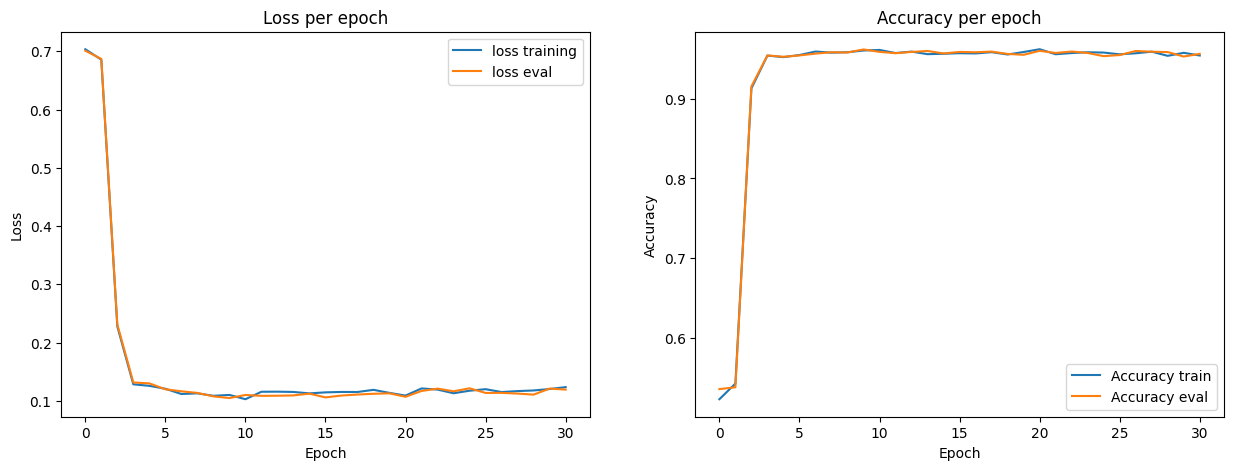

In [ ]:
plots(losses,
      losses_eval,
      accuracy_train,
      accuracy_val)

# Part 3 Tensor Backpropagation

Neural Network for MNIST dataset

## Numpy MLP

In [ ]:
# This is the MLP implementation in numpy, it is the same as in cuPy.
# The only change is np to cp.

import numpy as np
import matplotlib.pyplot as plt

class Linear_layer_numpy(object):

    def __init__(self,
                 input_dim: int,
                 output_dim: int,
                 input_layer: bool = False):

        self.size       = (input_dim, output_dim)
        self.parameters = {}
        self.gradients  = {}

        self.parameters['W'] = np.random.normal(0, 0.1, self.size) # W ~ N(0, 0.1)
        self.parameters['b'] = np.zeros((self.size[1]),) # initialize biases with zeros
        self.gradients['W']  = np.zeros(self.size) # initialize gradients with zeros
        self.gradients['b']  = np.zeros((self.size[1]),)

    def forward(self, x: np.ndarray)-> np.ndarray:
        self.x = x
        # print(f'x: {type(x)}')
        # print(f'W: {type(self.parameters["W"])}')
        out = np.matmul(x, self.parameters['W']) + self.parameters['b'] # Wx + b
        # print("out linear: ", out.shape)
        # print("W shape: ", self.parameters['W'].shape)
        # print()
        return out

    def backward(self, dout: np.ndarray)-> np.ndarray:
        # Compute the gradients of the loss with respect to the parameters
        self.gradients['W'] = np.matmul(self.x.T, dout)
        self.gradients['b'] = np.sum(dout, axis=0)
        # print("b grad shape: ", self.parameters['b'].shape )
        # Compute the gradient of the loss with respect to the input
        # print("dout linear: ", dout.shape)
        # print("W.T linear: ", self.parameters['W'].T.shape)
        assert not np.any(np.isnan(self.gradients['W'])), "Gradients 'W' contain NaN values"
        assert not np.any(np.isnan(self.gradients['b'])), "Gradients 'b' contain NaN values"
        dx = np.matmul(dout, self.parameters['W'].T)
        # print("dx linear: ", dx.shape)
        return dx

    def clear_cache(self):
        self.x = None

    def __repr__(self):
        return f"LinearLayer({self.size})"


class Sigmoid_layer_numpy(object):


    def forward(self, x: np.ndarray)-> np.ndarray:
        self.x = x
        # self.x = np.clip(x, -500, 500) # clip values to avoid overflow
        out = 1 / (1 + np.exp(-self.x))
        # print("out sigmoid: ", out.shape)
        return out

    def backward(self, dout: np.ndarray)-> np.ndarray:

        sigmoid_derivative = self.forward(self.x) * (1 - self.forward(self.x))
        # dout = dout.reshape(sigmoid_derivative.shape)
        # dx = np.dot(dout, sigmoid_derivative)
        # print("dout sigmoid: ", dout.shape)
        # print("sigmoid_derivative: ", sigmoid_derivative.shape)
        dx = dout * sigmoid_derivative
        # print("dx sigmoid: ", dx.shape)
        return dx

    def clear_cache(self):
        self.x = None

    def __repr__(self):
        return "Sigmoid_layer()"



class Softmax_numpy(object):
    def forward(self, x: np.ndarray)-> np.ndarray:
        mu = np.max(x, axis=1, keepdims=True)
        x = x - mu # avoid overflow
        # print(f"x soft: {x}")
        out = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
        self.out = out
        # print("out soft: ", out.shape)
        # print("out soft: ", out)
        # print()
        # self.out_ = out.copy()
        return out

    def backward(self, dout: np.ndarray)-> np.ndarray:
        # dout is the gradient of the loss w.r.t. the output of the softmax layer which is a vector
        # dx = self.out_ * (dout - np.sum(dout * self.out_, axis=0))
        dx = self.out * (dout - np.sum(dout * self.out, axis=1, keepdims=True))
        # print("dx soft: ", dx.shape)
        # print("dx soft: ", dx)
        return dx

    def clear_cache(self):
        self.out = None

    def __repr__(self):
        return "Softmax()"



class Cross_entropy_loss_numpy(object):
    def forward(self, x: np.ndarray, y: np.ndarray)-> np.ndarray:
        # T = np.eye(x.shape[1])[y]
        # out = -np.mean(T * np.log(x))
        # loss = np.sum(-np.log(x[range(x.shape[0]), y])) / x.shape[0]
        # epsilon = 1e-8 # to avoid log(0)
        loss = np.sum(-np.log(x[np.arange(x.shape[0]), y])) / x.shape[0]
        # print(f"loss: {loss}")
        return loss

    def backward(self, x: np.ndarray, y: np.ndarray)-> np.ndarray:
        # T = np.eye(x.shape[1])[y]
        # dx = -np.mean(T / x, axis=0)

        x[range(len(y)), y] -= 1
        dx = x
        # dx /= len(y)
        # print("dx loss: ", dx.shape)
        # print("dx loss: ", dx)
        return dx

    def __repr__(self):
        return "Cross_entropy_loss()"

class MLP_numpy(object):

    def __init__(self,
                 input_dim: int,
                 hidden_dim: list,
                 output_dim: int):
        """
        Initialize MLP with input, hidden and output dimensions
        """
        self.input_dim  = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.modules = [] # list of modules

        for i in range(len(hidden_dim)):
            if i == 0: # first layer
                self.modules.append(Linear_layer_numpy(input_dim, hidden_dim[i], input_layer=True))
                self.modules.append(Sigmoid_layer_numpy())
            elif i == len(hidden_dim) - 1: # last layer
                self.modules.append(Linear_layer_numpy(hidden_dim[i - 1], output_dim, input_layer=False))
                self.modules.append(Softmax_numpy())
            else: # hidden layers
                self.modules.append(Linear_layer_numpy(hidden_dim[i - 1], hidden_dim[i], input_layer=False))
                self.modules.append(Sigmoid_layer_numpy())

    def forward(self, x: np.ndarray)-> np.ndarray:

        for layer in self.modules:
            x = layer.forward(x)
        return x

    def backward(self, dout: np.ndarray)-> np.ndarray:

        for layer in reversed(self.modules):
            # print("layer: ", layer, "with dout: ", dout.shape)
            dout = layer.backward(dout)
        return dout

    def update_parameters(self, lr: float)-> None:

        # Update parameters of MLP with SGD
        for module in self.modules:
            if isinstance(module, Linear_layer):
                assert module.parameters['W'].shape == module.gradients['W'].shape, f"W {module.parameters['W'].shape} and dW {module.gradients['W'].shape} have different shapes"
                assert module.parameters['b'].shape == module.gradients['b'].shape, f"b {module.parameters['b'].shape} and db {module.gradients['b'].shape} have different shapes"
                module.parameters['W'] -= lr * module.gradients['W']
                module.parameters['b'] -= lr * module.gradients['b']

    def get_parameters(self)-> list:
        # Get weights and biases from all linear layers
        parameters = []
        for module in self.modules:
            if isinstance(module, Linear_layer):
                parameters.append(module.parameters['W'])
                parameters.append(module.parameters['b'])
        return parameters

    def clear_cache(self):
        for module in self.modules:
            module.clear_cache()

    def __repr__(self):
        repr_ = f"MLP({self.input_dim}, {self.hidden_dim}, {self.output_dim})" + f" with {self.modules} modules"
        return repr_




## modules and MLP with cuPy for NMINST

In [ ]:
!nvidia-smi # google colab

Fri Nov 17 15:33:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# https://docs.cupy.dev/en/stable/
!pip install -U cupy-cuda11x # using cupy, which is similar to numpy but with gpu support to go faster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: cupy-cuda11x
    Found existing installation: cupy-cuda11x 11.0.0
    Uninstalling cupy-cuda11x-11.0.0:
      Successfully uninstalled cupy-cuda11x-11.0.0


In [ ]:
import numpy as np
import cupy as cp # numpy with GPU, uses same numpy functions but with gpu capabilities
import matplotlib.pyplot as plt

# This is MLP with cuPy, it is faster since it uses GPU for its computations.

class Linear_layer(object):

    def __init__(self,
                 input_dim: int,
                 output_dim: int,
                 input_layer: bool = False):

        self.size       = (input_dim, output_dim)
        self.parameters = {}
        self.gradients  = {}

        self.parameters['W'] = cp.random.normal(0, 0.1, self.size) # W ~ N(0, 0.1)
        self.parameters['b'] = cp.zeros((self.size[1]),) # initialize biases with zeros
        self.gradients['W']  = cp.zeros(self.size) # initialize gradients with zeros
        self.gradients['b']  = cp.zeros((self.size[1]),)

    def forward(self, x: cp.ndarray)-> np.ndarray:
        self.x = x
        # print(f'x: {type(x)}')
        # print(f'W: {type(self.parameters["W"])}')
        # print(f'W: {self.parameters["W"]}')
        out = cp.matmul(x, self.parameters['W']) + self.parameters['b'] # Wx + b
        # print("out linear: ", out.shape)
        # print("W shape: ", self.parameters['W'].shape)
        # print()
        return out

    def backward(self, dout: cp.ndarray)-> np.ndarray:
        # Compute the gradients of the loss with respect to the parameters
        # print(f"dout linear backward: {dout}")
        # print(f"x linear backward: {self.x}")
        self.gradients['W'] = cp.matmul(self.x.T, dout)
        self.gradients['b'] = cp.sum(dout, axis=0)
        # print("b grad shape: ", self.parameters['b'].shape )
        # Compute the gradient of the loss with respect to the input
        # print("dout linear: ", dout.shape)
        # print("W.T linear: ", self.parameters['W'].T.shape)
        assert not cp.any(cp.isnan(self.gradients['W'])), "Gradients 'W' contain NaN values"
        assert not cp.any(cp.isnan(self.gradients['b'])), "Gradients 'b' contain NaN values"
        dx = cp.matmul(dout, self.parameters['W'].T)
        # print("dx linear: ", dx.shape)
        return dx

    def clear_cache(self):
        self.x = None

    def __repr__(self):
        return f"LinearLayer({self.size})"


class Sigmoid_layer(object):


    def forward(self, x: cp.ndarray)-> cp.ndarray:
        self.x = x
        # print(f"x sigmoid: {x}")
        # self.x = cp.clip(x, -50000, 50000) # clip values to avoid overflow
        out = 1 / (1 + cp.exp(-self.x))
        # print("out sigmoid: ", out.shape)
        # print("out sigmoid: ", out)
        return out

    def backward(self, dout: cp.ndarray)-> cp.ndarray:

        sigmoid_derivative = self.forward(self.x) * (1 - self.forward(self.x))
        # dout = dout.reshape(sigmoid_derivative.shape)
        # dx = np.dot(dout, sigmoid_derivative)
        # print("dout sigmoid: ", dout.shape)
        # print("sigmoid_derivative: ", sigmoid_derivative.shape)
        dx = dout * sigmoid_derivative
        # print("dx sigmoid: ", dx.shape)
        # print("dx sigmoid: ", dx)
        return dx

    def clear_cache(self):
        self.x = None

    def __repr__(self):
        return "Sigmoid_layer()"


class Softmax(object):
    def forward(self, x: cp.ndarray)-> cp.ndarray:
        mu = cp.max(x, axis=1, keepdims=True)
        x = x - mu # avoid overflow
        # print(f"x soft: {x}")
        out = cp.exp(x) / cp.sum(cp.exp(x), axis=1, keepdims=True)
        self.out = out
        # print("out soft: ", out.shape)
        # print("out soft: ", out)
        # print()
        # self.out_ = out.copy()
        return out

    def backward(self, dout: cp.ndarray)-> cp.ndarray:
        # dout is the gradient of the loss w.r.t. the output of the softmax layer which is a vector
        # dx = self.out_ * (dout - np.sum(dout * self.out_, axis=0))
        # dx = self.out * (dout - cp.sum(dout * self.out, axis=1, keepdims=True))
        dx = dout
        # print("dx soft: ", dx.shape)
        # print("dx soft: ", dx)
        return dx

    def clear_cache(self):
        self.out = None

    def __repr__(self):
        return "Softmax()"



class Cross_entropy_loss(object):
    def forward(self, x: cp.ndarray, y: cp.ndarray)-> cp.ndarray:
        # T = np.eye(x.shape[1])[y]
        # out = -np.mean(T * np.log(x))
        # loss = np.sum(-np.log(x[range(x.shape[0]), y])) / x.shape[0]
        # epsilon = 1e-8 # to avoid log(0)
        loss = cp.sum(-cp.log(x[cp.arange(x.shape[0]), y])) / x.shape[0]
        # print(f"loss: {loss}")
        return loss

    def backward(self, x: cp.ndarray, y: cp.ndarray)-> cp.ndarray:
        # T = np.eye(x.shape[1])[y]
        # dx = -np.mean(T / x, axis=0)

        x[range(len(y)), y] -= 1
        dx = x
        # dx /= len(y)
        # print("dx loss: ", dx.shape)
        # print("dx loss: ", dx)
        return dx

    def __repr__(self):
        return "Cross_entropy_loss()"



class MLP(object):

    def __init__(self,
                 input_dim: int,
                 hidden_dim: list,
                 output_dim: int):
        """
        Initialize MLP with input, hidden and output dimensions
        """
        self.input_dim  = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.modules = [] # list of modules

        for i in range(len(hidden_dim)):
            if i == 0: # first layer
                self.modules.append(Linear_layer(input_dim, hidden_dim[i], input_layer=True))
                self.modules.append(Sigmoid_layer())
            elif i == len(hidden_dim) - 1: # last layer
                self.modules.append(Linear_layer(hidden_dim[i - 1], output_dim, input_layer=False))
                self.modules.append(Softmax())
            else: # hidden layers
                self.modules.append(Linear_layer(hidden_dim[i - 1], hidden_dim[i], input_layer=False))
                self.modules.append(Sigmoid_layer())

    def forward(self, x: cp.ndarray)-> cp.ndarray:

        for layer in self.modules:
            x = layer.forward(x)
        return x

    def backward(self, dout: cp.ndarray)-> cp.ndarray:

        for layer in reversed(self.modules):
            # print("layer: ", layer, "with dout: ", dout.shape)
            dout = layer.backward(dout)
        return dout

    def update_parameters(self, lr: float)-> None:

        # Update parameters of MLP with SGD
        for module in self.modules:
            if isinstance(module, Linear_layer):
                assert module.parameters['W'].shape == module.gradients['W'].shape, f"W {module.parameters['W'].shape} and dW {module.gradients['W'].shape} have different shapes"
                assert module.parameters['b'].shape == module.gradients['b'].shape, f"b {module.parameters['b'].shape} and db {module.gradients['b'].shape} have different shapes"
                module.parameters['W'] -= lr * module.gradients['W']
                module.parameters['b'] -= lr * module.gradients['b']

    def get_parameters(self)-> list:
        # Get weights and biases from all linear layers
        parameters = []
        for module in self.modules:
            if isinstance(module, Linear_layer):
                parameters.append(module.parameters['W'])
                parameters.append(module.parameters['b'])
        return parameters

    def clear_cache(self):
        for module in self.modules:
            module.clear_cache()

    def __repr__(self):
        repr_ = f"MLP({self.input_dim}, {self.hidden_dim}, {self.output_dim})" + f" with {self.modules} modules"
        return repr_


## Training on MNIST data

In [ ]:
from tqdm.auto import tqdm
# from sklearn.preprocessing import StandardScaler


def train(model: MLP,
          loss_function: Cross_entropy_loss,
          x_train: np.ndarray,
          y_train: np.ndarray,
          x_val: np.ndarray,
          y_val: np.ndarray,
          epochs: int,
          lr: float,
          batch_size: int = 128,
          with_numpy: bool = False)-> tuple:
        """
        Train MLP with SGD
        """
        print()
        print(f"STARTING TRAINING WITH BATCH SIZE {batch_size} AND LEARNING RATE {lr}")
        print()
        print(f"NUMBER OF BATCHES PER EPOCH: {len(x_train) // batch_size}")
        print()
        # initialize empty lists for plots
        losses_training                = []
        losses_validation              = []
        loss_training_per_batch        = []
        loss_validation_per_batch      = []

        accuracy_train_per_batch       = []
        accuracy_validation_per_batch  = []
        accuracy_train                 = []
        accuracy_val                   = []



        # scaler = StandardScaler()
        # x_train = scaler.fit_transform(x_train)
        # x_val = scaler.transform(x_val)

        # At some point I had NaN gradients with lr 0.1, this prevented it.
        if not with_numpy: # training with cupy
            x_train = cp.asarray(x_train).astype(cp.float64)
            y_train = cp.asarray(y_train).astype(cp.int64)
            x_val   = cp.asarray(x_val).astype(cp.float64)
            y_val   = cp.asarray(y_val).astype(cp.int64)
        else: # numpy
            x_train = np.asarray(x_train).astype(np.float64)
            y_train = np.asarray(y_train).astype(np.int64)
            x_val   = np.asarray(x_val).astype(np.float64)
            y_val   = np.asarray(y_val).astype(np.int64)


        # loop through epochs
        for epoch in range(epochs):
            # print("epoch: ", epoch)
            loss_train_per_epoch    = []
            loss_val_per_epoch      = []
            accuracy_per_epoch      = []
            accuracy_eval_per_epoch = []
            # loop through batches
            for i in tqdm(range(0, len(x_train), batch_size)):
                # print("batch: ", i)
                x_train_batch = x_train[i:i+batch_size]
                y_train_batch = y_train[i:i+batch_size]

                # shuffle data
                if not with_numpy:
                   indices = cp.random.permutation(len(x_train_batch))
                else:
                   indices = np.random.permutation(len(x_train_batch))

                x_train_batch = x_train_batch[indices]
                y_train_batch = y_train_batch[indices]

                # forward pass
                out = model.forward(x_train_batch)
                # print("out: ", out.shape)
                # print("y_train: ", y_train[i:i+batch_size].shape)
                loss = loss_function.forward(out, y_train_batch)
                # print("loss: ", loss)
                # print()
                # saving data for plots
                loss_train_per_epoch.append(loss)
                accuracy_per_epoch.append(np.mean(np.argmax(out, axis=1) == y_train_batch))
                # backward pass
                dout = loss_function.backward(out, y_train_batch)
                # print("dout: ", dout.shape)
                model.backward(dout)
                # update parameters
                model.update_parameters(lr)

                # evaluation
                out_val = model.forward(x_val)
                loss_val = loss_function.forward(out_val, y_val)
                loss_val_per_epoch.append(loss_val)
                accuracy_eval_per_epoch.append(np.mean(np.argmax(out_val, axis=1) == y_val))
            # values for plots !
            loss_training_per_batch.append(loss_train_per_epoch)
            loss_validation_per_batch.append(loss_val_per_epoch)
            accuracy_train_per_batch.append(accuracy_per_epoch)
            accuracy_validation_per_batch.append(accuracy_eval_per_epoch)

            losses_training.append(cp.mean(cp.array(loss_train_per_epoch)))
            losses_validation.append(cp.mean(cp.array(loss_val_per_epoch)))
            accuracy_train.append(cp.mean(cp.array(accuracy_per_epoch)))
            accuracy_val.append(cp.mean(cp.array(accuracy_eval_per_epoch)))
            # clear cache for memory efficiency and for next epoch
            model.clear_cache()

        return (losses_training,
                loss_training_per_batch,
                loss_validation_per_batch,
                losses_validation,
                accuracy_train,
                accuracy_train_per_batch,
                accuracy_validation_per_batch,
                accuracy_val,
                model.get_parameters())


In [ ]:
import time

# NMINST dataset
######################################################
(x_train, y_train), (x_val, y_val), num_cls = load_mnist()
(x_train_final, y_train_final), (x_test, y_test), num_cls = load_mnist(final=True)

input_dim  = x_train.shape[1] # number of input features
hidden_dim = [300, 1] # one hidden layer with 300 units
output_dim = num_cls # number of classes
epochs = 1
lr = [0.001]
batch_size = 128 # batch size
######################################################

model = MLP(input_dim, hidden_dim, output_dim) # initialize model
model_numpy = MLP_numpy(input_dim, hidden_dim, output_dim) # initialize model
loss_function = Cross_entropy_loss() # initialize loss function
loss_function_numpy = Cross_entropy_loss_numpy()
print("model: ", model)
print("model numpy: ", model_numpy)
print()

# TESTING NUMPY VS CUPY

start_ = time.time()
for lr_ in lr:
    all = train(model,
              loss_function,
              x_train,
              y_train,
              x_val,
              y_val,
              epochs,
              lr_,
              batch_size)
end_ = time.time()
result_cupy = end_ - start_
print(f'This is the time it took for {epochs} epochs, with batch size {batch_size}  for cuPy model: {result_cupy} seconds')
print()

start_ = time.time()
for lr_ in lr:
    all = train(model_numpy,
                loss_function_numpy,
                x_train,
                y_train,
                x_val,
                y_val,
                epochs,
                lr_,
                batch_size,
                with_numpy = True)
end_ = time.time()
result_numpy = end_ - start_
print(f'This is the time it took for {epochs} epochs, with batch size {batch_size} for numpy model: {result_numpy} seconds')
print()

print(f"which means that cuPy is {((result_numpy - result_cupy)/result_numpy) * 100:.2f} % faster")


model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules
model numpy:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules


STARTING TRAINING WITH BATCH SIZE 128 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 429



  0%|          | 0/430 [00:00<?, ?it/s]

This is the time it took for 1 epochs, with batch size 128  for cuPy model: 8.78636884689331 seconds


STARTING TRAINING WITH BATCH SIZE 128 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 429



  0%|          | 0/430 [00:00<?, ?it/s]

This is the time it took for 1 epochs, with batch size 128 for numpy model: 70.15387058258057 seconds

which means that cuPy is 87.48 % faster


In [ ]:
# NMINST dataset
cp.random.seed(73) #sheldon's prime number
######################################################
(x_train, y_train), (x_val, y_val), num_cls = load_mnist()
(x_train_final, y_train_final), (x_test, y_test), num_cls = load_mnist(final=True)

input_dim  = x_train.shape[1] # number of input features
hidden_dim = [300, 1] # one hidden layer with 300 units
output_dim = num_cls # number of classes
epochs = 10
# lr = [0.00001 * (10**i) for i in range(5)] # logaritmic lrs as explained in lecture 4
lr = [0.001]
batch_size = 256 # batch size
######################################################


# Having in mind that cuPy is faster than numpy, I will do all my experiments with cuPy
model = MLP(input_dim, hidden_dim, output_dim) # initialize model
print ("model: ", model)
print()

print(f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_val: {x_val.shape}, y_val: {y_val.shape}")

losses_per_train_lr = {}
losses_per_val_lr = {}

losses_per_batch_per_lr_train = {}
losses_per_batch_per_lr_eval  = {}

accuracy_per_batch_per_lr_train = {}
accuracy_per_batch_per_lr_eval  = {}

accuracy_train_per_lr = {}
accuracy_val_per_lr = {}
weights_per_lr = {} # saving weights to see best model

for lr_ in lr:
    model = MLP(input_dim, hidden_dim, output_dim) # initialize model each new lr
    loss_function = Cross_entropy_loss() # initialize loss function
    results = train(model,
                    loss_function,
                    x_train,
                    y_train,
                    x_val,
                    y_val,
                    epochs,
                    lr_,
                    batch_size)

    (losses_train,
    loss_training_per_batch,
    loss_validation_per_batch,
    losses_val,
    accuracy_train,
    accuracy_train_per_batch,
    accuracy_validation_per_batch,
    accuracy_val,
    weights) = results

    losses_per_train_lr[lr_]             = losses_train
    losses_per_val_lr[lr_]               = losses_val

    losses_per_batch_per_lr_train[lr_]   = loss_training_per_batch
    losses_per_batch_per_lr_eval[lr_]    = loss_validation_per_batch

    accuracy_per_batch_per_lr_train[lr_] = accuracy_train_per_batch
    accuracy_per_batch_per_lr_eval[lr_]  = accuracy_validation_per_batch

    accuracy_train_per_lr[lr_]           = accuracy_train
    accuracy_val_per_lr[lr_]             = accuracy_val

    weights_per_lr[lr_]                  = weights

model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

x_train: (55000, 784), y_train: (55000,), x_val: (5000, 784), y_val: (5000,)

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

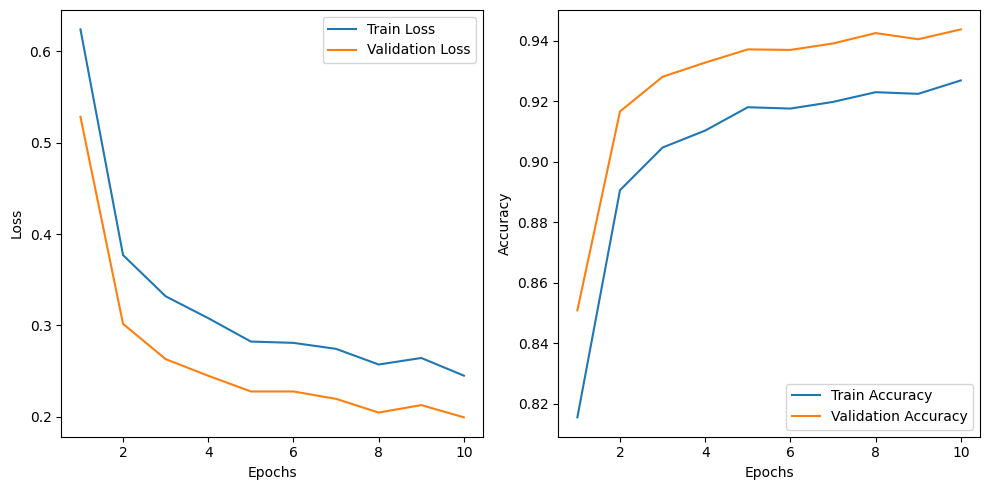

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lr = 0.001
data_dict = {'Train Loss': losses_per_batch_per_lr_train[lr],
             'Validation Loss': losses_per_batch_per_lr_eval[lr],
             'Train Accuracy': accuracy_per_batch_per_lr_train[lr],
             'Validation Accuracy': accuracy_per_batch_per_lr_eval[lr]}

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss
ax = axs[0]
for label, data in zip(['Train Loss', 'Validation Loss'], [data_dict['Train Loss'], data_dict['Validation Loss']]):
    # Process the data
    data = [[i.get() for i in array] for array in data]

    # Calculate average per epoch
    avg_per_epoch = [np.mean(lst) for lst in data]

    # Plot average per epoch
    epochs = range(1, len(avg_per_epoch)+1)
    ax.plot(epochs, avg_per_epoch, label=label)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Plot accuracy
ax = axs[1]
for label, data in zip(['Train Accuracy', 'Validation Accuracy'], [data_dict['Train Accuracy'], data_dict['Validation Accuracy']]):
    # Process the data
    data = [[i.get() for i in array] for array in data]

    # Calculate average per epoch
    avg_per_epoch = [np.mean(lst) for lst in data]

    # Plot average per epoch
    epochs = range(1, len(avg_per_epoch)+1)
    ax.plot(epochs, avg_per_epoch, label=label)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()

plt.tight_layout()
plt.savefig("q7_1.pdf")
plt.show()



In [ ]:
# NMINST dataset
cp.random.seed(73) #sheldon's prime number
######################################################
(x_train, y_train), (x_val, y_val), num_cls = load_mnist()
(x_train_final, y_train_final), (x_test, y_test), num_cls = load_mnist(final=True)

input_dim  = x_train.shape[1] # number of input features
hidden_dim = [300, 1] # one hidden layer with 300 units
output_dim = num_cls # number of classes
epochs = 10
lr = [0.00001 * (10**i) for i in range(5)] # logaritmic lrs as explained in lecture 4
# lr = [0.001]
batch_size = 256 # batch size
######################################################


# Having in mind that cuPy is faster than numpy, I will do all my experiments with cuPy
model = MLP(input_dim, hidden_dim, output_dim) # initialize model
print ("model: ", model)
print()

print(f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_val: {x_val.shape}, y_val: {y_val.shape}")

losses_per_train_lr = {}
losses_per_val_lr = {}

losses_per_batch_per_lr_train = {}
losses_per_batch_per_lr_eval  = {}

accuracy_per_batch_per_lr_train = {}
accuracy_per_batch_per_lr_eval  = {}

accuracy_train_per_lr = {}
accuracy_val_per_lr = {}
weights_per_lr = {} # saving weights to see best model

for lr_ in lr:
    model = MLP(input_dim, hidden_dim, output_dim) # initialize model each new lr
    loss_function = Cross_entropy_loss() # initialize loss function
    results = train(model,
                    loss_function,
                    x_train,
                    y_train,
                    x_val,
                    y_val,
                    epochs,
                    lr_,
                    batch_size)

    (losses_train,
    loss_training_per_batch,
    loss_validation_per_batch,
    losses_val,
    accuracy_train,
    accuracy_train_per_batch,
    accuracy_validation_per_batch,
    accuracy_val,
    weights) = results

    losses_per_train_lr[lr_]             = losses_train
    losses_per_val_lr[lr_]               = losses_val

    losses_per_batch_per_lr_train[lr_]   = loss_training_per_batch
    losses_per_batch_per_lr_eval[lr_]    = loss_validation_per_batch

    accuracy_per_batch_per_lr_train[lr_] = accuracy_train_per_batch
    accuracy_per_batch_per_lr_eval[lr_]  = accuracy_validation_per_batch

    accuracy_train_per_lr[lr_]           = accuracy_train
    accuracy_val_per_lr[lr_]             = accuracy_val

    weights_per_lr[lr_]                  = weights

model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

x_train: (55000, 784), y_train: (55000,), x_val: (5000, 784), y_val: (5000,)

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 1e-05

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]


STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.0001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]


STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]


STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.01

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]


STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.1

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


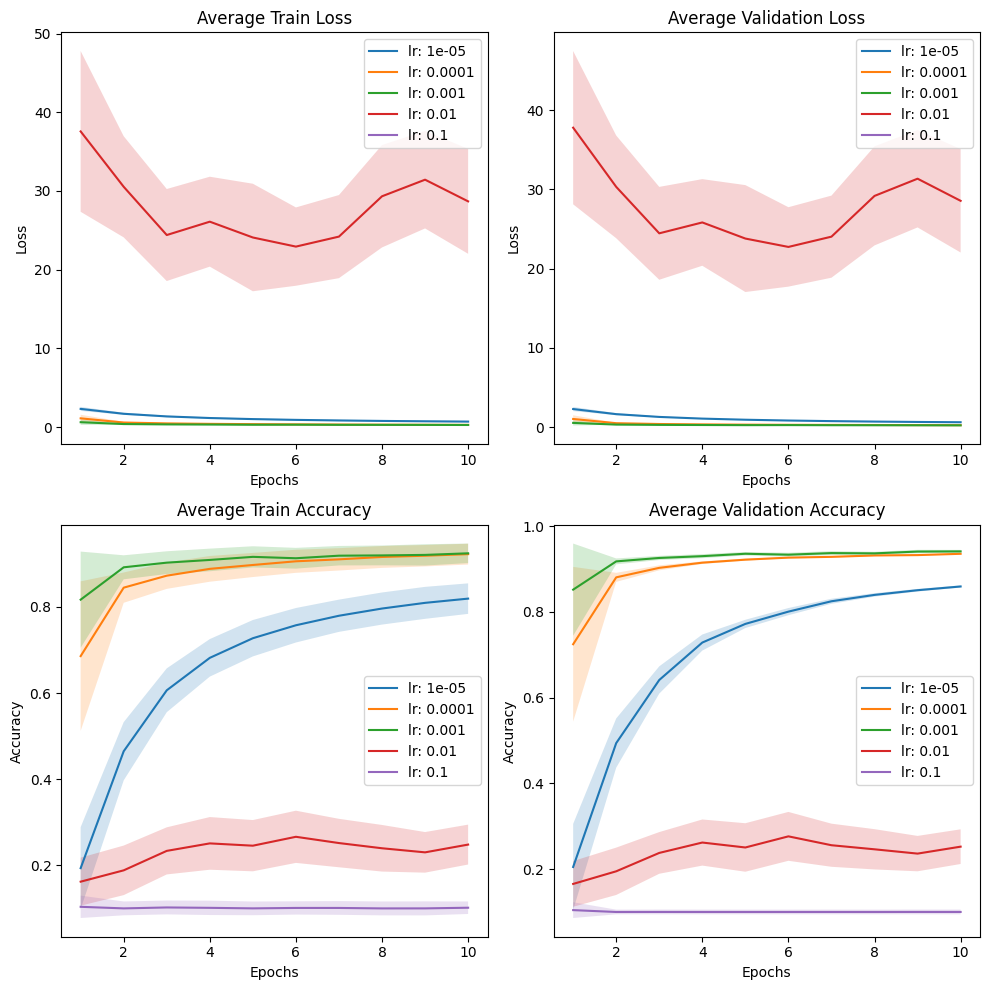

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dicts = [losses_per_batch_per_lr_train, losses_per_batch_per_lr_eval, accuracy_per_batch_per_lr_train, accuracy_per_batch_per_lr_eval]
dict_names = ['Average Train Loss', 'Average Validation Loss', 'Average Train Accuracy', 'Average Validation Accuracy']
ylabels = ['Loss', 'Loss', 'Accuracy', 'Accuracy']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for j, (dict_, ax, dict_name, ylabel) in enumerate(zip(dicts, axs, dict_names, ylabels)):
    for lr, data in dict_.items():

        data = [[i.get() for i in batch_data] for batch_data in data]

        # Calculate average loss or accuracy per epoch
        avg_per_epoch = [np.mean(batch_data) for batch_data in data]
        std_per_epoch = [np.std(batch_data) for batch_data in data]

        # Plot average loss or accuracy per epoch
        epochs = range(1, len(avg_per_epoch)+1)
        ax.plot(epochs, avg_per_epoch, label=f'lr: {lr}')
        ax.fill_between(epochs, [avg - std for avg, std in zip(avg_per_epoch, std_per_epoch)], [avg + std for avg, std in zip(avg_per_epoch, std_per_epoch)], alpha=0.2)
        ax.set_xlabel('Epochs')
        ax.set_ylabel(ylabel)
        ax.set_title(dict_name)
        ax.legend()


plt.tight_layout()
plt.savefig("part3.pdf")
plt.show()





In [ ]:
import pickle
import os
# Find best model
best_lr = max(accuracy_val_per_lr, key=accuracy_val_per_lr.get)
# best_lr = 0.001
best_weights = weights_per_lr[best_lr]
print(f"Best learning rate: {best_lr}")

# Initialize new model with best weights
best_model = MLP(input_dim, hidden_dim, output_dim)

i = 0
for module in best_model.modules:
    if isinstance(module, Linear_layer):
        # list [W1, b1, W2, b2, ...]
        module.parameters['W'] = best_weights[i]
        module.parameters['b'] = best_weights[i+1]
        i += 2

x_train_final = cp.asarray(x_train_final)
y_train_final = cp.asarray(y_train_final)

x_test = cp.asarray(x_test)
y_test = cp.asarray(y_test)
# Evaluate on full Training data
out_train = best_model.forward(x_train_final)
loss_train = loss_function.forward(out_train, y_train_final)
accuracy_train = np.mean(np.argmax(out_train, axis=1) == y_train_final)
print()
print(f"Accuracy on training data: {accuracy_train * 100:.2f}%")
print(f"Loss on training data: {loss_train:.2f}")
print()
# Evaluate on test data
out_test = best_model.forward(x_test)
loss_test = loss_function.forward(out_test, y_test)
accuracy_test = np.mean(np.argmax(out_test, axis=1) == y_test)
print()
print(f"Accuracy on test data: {accuracy_test * 100:.2f}%")
print(f"Loss on test data: {loss_test:.2f}")

# Save model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Best learning rate: 0.001

Accuracy on training data: 93.33%
Loss on training data: 0.23


Accuracy on test data: 93.19%
Loss on test data: 0.23


In [ ]:
# NMINST dataset
######################################################
(x_train, y_train), (x_val, y_val), num_cls = load_mnist()
(x_train_final, y_train_final), (x_test, y_test), num_cls = load_mnist(final=True)

input_dim  = x_train.shape[1] # number of input features
hidden_dim = [300, 1] # one hidden layer with 300 units
output_dim = num_cls # number of classes
epochs = 10
lr = best_lr
batch_size = 256 # batch size
######################################################

num_trials = 10  # number of times to train the model from a random initialization

# Initialize dictionaries to store the losses and accuracies for each trial
losses_train_trials   = {}
losses_val_trials     = {}
accuracy_train_trials = {}
accuracy_val_trials   = {}


for trial in range(num_trials):
    print(f'THIS IS TRIAL {trial}')
    model = MLP(input_dim, hidden_dim, output_dim)  # initialize model each time
    print("model: ", model)
    results = train(model,
                    loss_function,
                    x_train,
                    y_train,
                    x_val,
                    y_val,
                    epochs,
                    lr,
                    batch_size)

    (losses_train,
    loss_training_per_batch,
    loss_validation_per_batch,
    losses_val,
    accuracy_train,
    accuracy_train_per_batch,
    accuracy_validation_per_batch,
    accuracy_val,
    weights) = results

    # Append the losses and accuracies for this trial
    losses_train_trials[trial]   = losses_train
    losses_val_trials[trial]     = losses_val
    accuracy_train_trials[trial] = accuracy_train
    accuracy_val_trials[trial]   = accuracy_val





THIS IS TRIAL 0
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 1
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 2
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 3
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 4
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 5
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 6
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 7
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 8
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

THIS IS TRIAL 9
model:  MLP(784, [300, 1], 10) with [LinearLayer((784, 300)), Sigmoid_layer(), LinearLayer((300, 10)), Softmax()] modules

STARTING TRAINING WITH BATCH SIZE 256 AND LEARNING RATE 0.001

NUMBER OF BATCHES PER EPOCH: 214



  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

In [ ]:

losses_train_epoch = [[] for _ in range(epochs)]
losses_val_epoch = [[] for _ in range(epochs)]
accuracy_train_epoch = [[] for _ in range(epochs)]
accuracy_val_epoch = [[] for _ in range(epochs)]


for trial in range(num_trials):

    for epoch in range(epochs):

        losses_train_epoch[epoch].append(losses_train_trials[trial][epoch])
        losses_val_epoch[epoch].append(losses_val_trials[trial][epoch])
        accuracy_train_epoch[epoch].append(accuracy_train_trials[trial][epoch])
        accuracy_val_epoch[epoch].append(accuracy_val_trials[trial][epoch])


avg_losses_train = [sum(losses)/len(losses) for losses in losses_train_epoch]
avg_losses_val = [sum(losses)/len(losses) for losses in losses_val_epoch]
avg_accuracy_train = [sum(accuracy)/len(accuracy) for accuracy in accuracy_train_epoch]
avg_accuracy_val = [sum(accuracy)/len(accuracy) for accuracy in accuracy_val_epoch]

losses_train_epoch = [cp.asarray(i) for i in losses_train_epoch]
losses_val_epoch  = [cp.asarray(i) for i in losses_val_epoch ]
accuracy_train_epoch = [cp.asarray(i) for i in accuracy_train_epoch]
accuracy_val_epoch = [cp.asarray(i) for i in accuracy_val_epoch]

std_losses_train = [cp.std(losses) for losses in losses_train_epoch]
std_losses_val = [cp.std(losses) for losses in losses_val_epoch]
std_accuracy_train = [cp.std(accuracy) for accuracy in accuracy_train_epoch]
std_accuracy_val = [cp.std(accuracy) for accuracy in accuracy_val_epoch]

avg_losses_train = [i.get() for i in avg_losses_train]
avg_losses_val = [i.get() for i in avg_losses_val]
avg_accuracy_train = [i.get() for i in avg_accuracy_train]
avg_accuracy_val = [i.get() for i in avg_accuracy_val]


std_losses_train = [i.get() for i in std_losses_train]
std_losses_val = [i.get() for i in std_losses_val]
std_accuracy_train = [i.get() for i in std_accuracy_train]
std_accuracy_val = [i.get() for i in std_accuracy_val]



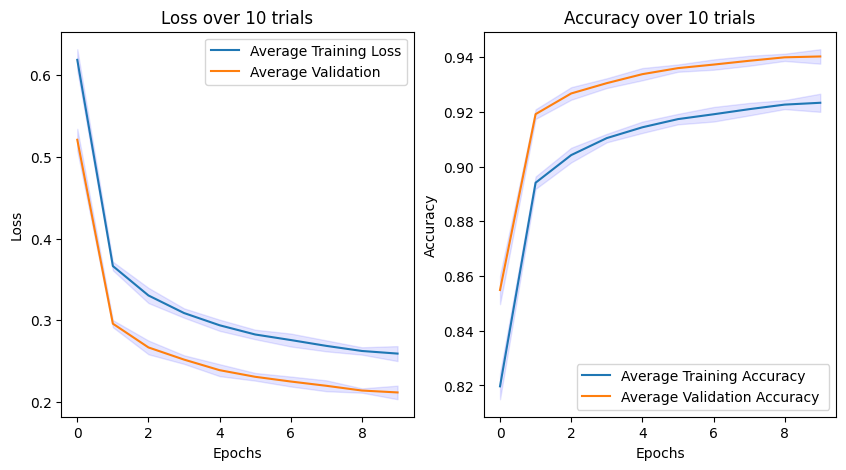

In [ ]:




fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].plot(avg_losses_train, label='Average Training Loss')
axs[0].fill_between(range(epochs), np.array(avg_losses_train) - np.array(std_losses_train), np.array(avg_losses_train) + np.array(std_losses_train), color='b', alpha=.1)

axs[0].plot(avg_losses_val, label='Average Validation')
axs[0].fill_between(range(epochs), np.array(avg_losses_val) - np.array(std_losses_val), np.array(avg_losses_val) + np.array(std_losses_val), color='b', alpha=.1)
axs[0].set_title('Loss over 10 trials')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()




axs[1].plot(avg_accuracy_train, label='Average Training Accuracy')
axs[1].plot(avg_accuracy_val, label='Average Validation Accuracy ')
axs[1].fill_between(range(epochs), np.array(avg_accuracy_train) - np.array(std_accuracy_train), np.array(avg_accuracy_train) + np.array(std_accuracy_train), color='b', alpha=.1)
axs[1].fill_between(range(epochs), np.array(avg_accuracy_val) - np.array(std_accuracy_val), np.array(avg_accuracy_val) + np.array(std_accuracy_val), color='b', alpha=.1)
axs[1].set_title('Accuracy over 10 trials')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
plt.savefig('10_trials.pdf')
plt.show()



